# 2.基本影像處理

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

img_path = 'C:/Users/Huai-Uin/Documents/GitHub/1st-DL-CVMarathon/picture/lena.png'
img = cv2.imread(img_path)

## (1)在圖片上繪製圖案

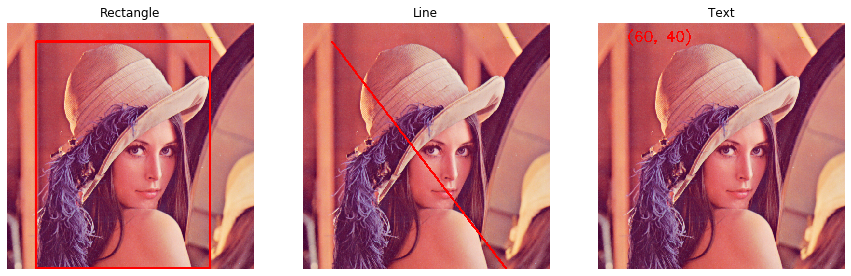

In [2]:
# 獲得用紅匡標注的圖片
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (0, 0, 255), 3)

# 獲得用對角線標注的圖片
img_line = img.copy()
cv2.line(img_line, (60, 40), (420, 510), (0, 0, 255), 3)

# 獲得具有座標標注的圖片
img_text = img.copy()
cv2.putText(img_text, '(60, 40)', (60, 40), 0, 1, (0, 0, 255), 2)

# 利用 subplot 將三張圖片繪製出來
display_imgs = [img_rect, img_line, img_text]
display_titles = ['Rectangle', 'Line', 'Text']

plt.figure(figsize = (15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1, title = display_titles[i])
    plt.imshow(display_imgs[i][:, :, [2, 1, 0]])
    plt.axis('off')
plt.show()

## (2)繪製 Histogram
- 獲得 3 個 channel (RGB) 的 histogram
- 利用 subplot 繪製出來
- cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
    - 影像：影像的來源，其型別可以是 uint8 或 float32，變數必須放在中括號當中，例如：[img]。
    - 通道：指定影像的通道（channel），同樣必須放在中括號當中。若為灰階影像，則通道就要指定為 [0]，若為彩色影像則可用 [0]、[1] 或 [2] 指定 藍色、綠色或紅色的通道。
    - 遮罩：以遮罩指定要納入計算的圖形區域，若指定為 None 則會計算整張圖形的所有像素。
    - 區間數量：指定直方圖分隔區間的數量（bins），也就是圖形畫出來要有幾條長方形。
    - 數值範圍：指定要計算的像素值範圍，通常都是設為 [0,256]（計算所有的像素值）。

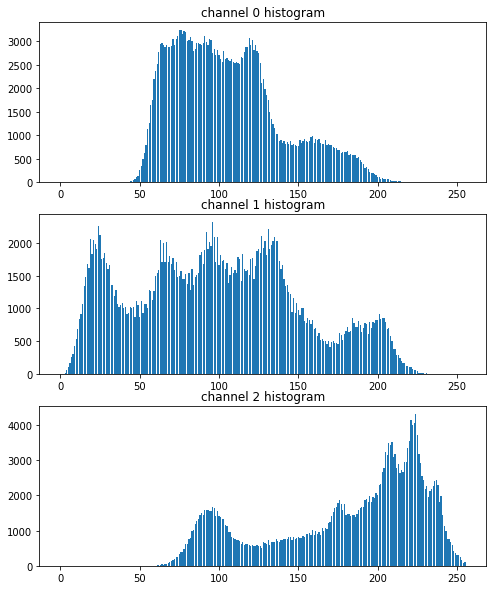

In [3]:
plt.figure(figsize = (8, 10))
for i in range(3):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(3, 1, i + 1, title = 'channel {} histogram'.format(i))
    plt.bar(range(0, 256), hist[:, 0])
plt.show()

# (3)繪製 Histogram
- 將圖片分別轉為HSV
- 利用 subplot 繪製出來

C:\Users\Huai-Uin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\Huai-Uin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


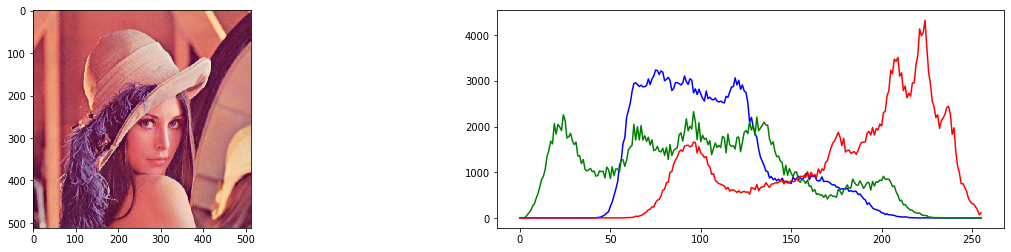

In [4]:
# 畫出 RGB 三種顏色的分佈圖
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.imshow(img[:, :, [2, 1, 0]])
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0, 256])
    plt.subplot(1,2,2)
    plt.plot(histr, color = col)
plt.show()

解決錯誤訊息

參考資料:
- https://www.cnpython.com/qa/36396
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- https://blog.csdn.net/TeFuirnever/article/details/93724227

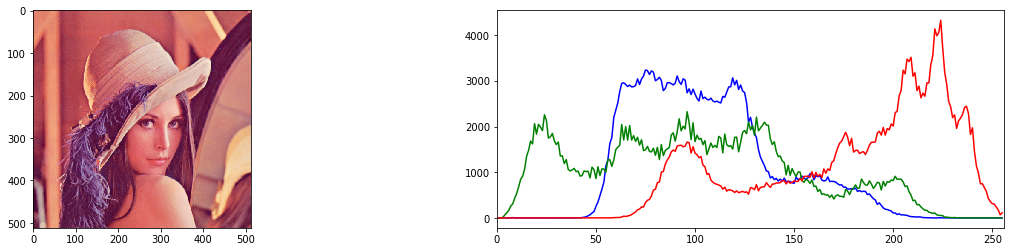

In [5]:
# 畫出 RGB 三種顏色的分佈圖
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,4))
ax1.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0, 256])
    ax2.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

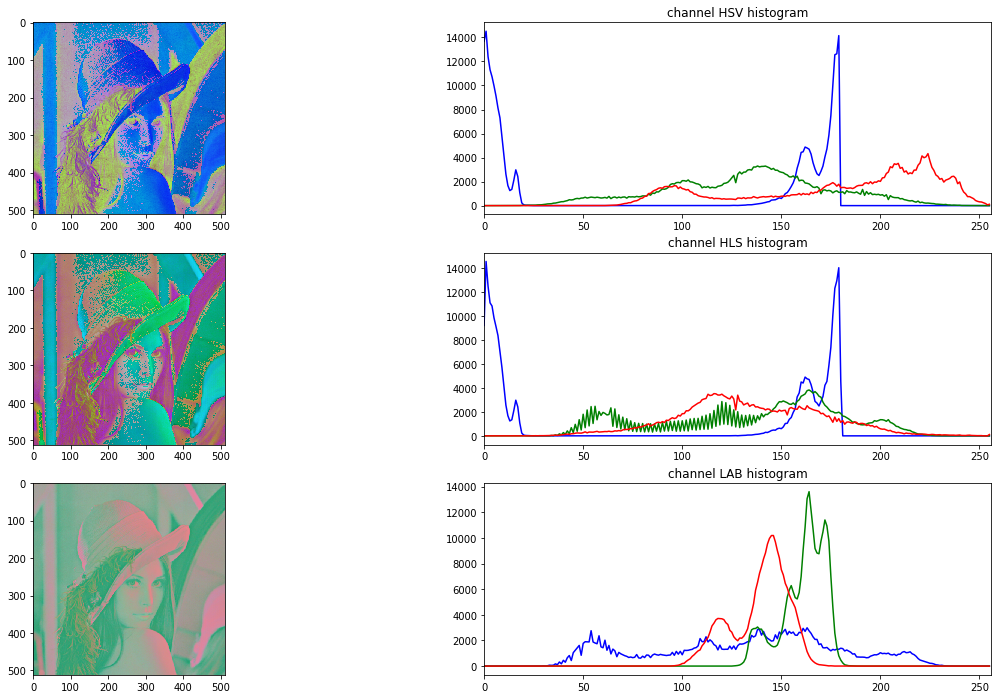

In [8]:
import warnings
warnings.filterwarnings('ignore')
img_dirc = {
    'HSV':cv2.COLOR_BGR2HSV,
    'HLS':cv2.COLOR_BGR2HLS,
    'LAB':cv2.COLOR_BGR2LAB
}
color = ('b','g','r')
plt.figure(figsize = (20, 12))
for i, n in enumerate(img_dirc.items()):
    img_cvt = cv2.cvtColor(img,n[1])
    plt.subplot(3, 2 ,i*2+1)
    plt.imshow(img_cvt)
    for x,col in enumerate(color):
        histr = cv2.calcHist([img_cvt], [x], None, [256], [0, 256])
        plt.subplot(3, 2, (i+1)*2, title = 'channel {} histogram'.format(n[0]))
        plt.plot(histr, color = col)
        plt.xlim([0, 256])
plt.show()



## (4)圖形遮罩

- 參考資料:https://blog.gtwang.org/programming/python-opencv-matplotlib-plot-histogram-tutorial/

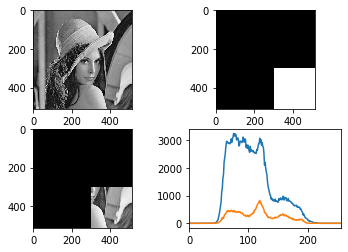

In [9]:
# 轉為灰階圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 建立圖形遮罩
mask = np.zeros(gray.shape, np.uint8)
mask[300:780, 300:1620] = 255

# 計算套用遮罩後的圖形
masked_gray = cv2.bitwise_and(gray, gray, mask = mask)

# 以原圖計算直方圖
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])

# 以套用遮罩後的圖計算直方圖
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

# 繪製結果
plt.subplot(221), plt.imshow(gray, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_gray, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()